## Data Mining and Machine Learning
### Clasification using Neural Networks and Deep Learning
#### Edgar Acuna 
#### January 2022
#### Datasets:  Toy example, Diabetes, Landsat and, Shuttle
#### Libraries: Scikit Learn, H20

In [71]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Example 1. Neural Nets applied to the prediction of the final grade based on the first two exams: E1 and E2

In [72]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [73]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.to_numpy()
X1=X.to_numpy()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)

In [74]:
#Training a neural net with one hidden layer containing 5 units
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y) 

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=99,
              solver='lbfgs')

In [75]:
#Showing  the weights
mlp.coefs_

[array([[-1.92864728e+01, -2.19842012e-02,  4.66125907e+01,
         -1.21214465e+01, -1.66607565e+01],
        [ 9.29670838e+01, -3.73197174e-01,  4.15534374e+01,
         -1.23326054e+01, -3.20080488e+00]]),
 array([[-7.18327688e-04],
        [ 9.44034376e-01],
        [ 1.11408734e-02],
        [ 1.96769231e+00],
        [-1.39385187e+00]])]

In [76]:
#Showing the biases
mlp.intercepts_

[array([-7.47103877,  0.45692388,  1.40033409, -0.1631209 ,  0.57263237]),
 array([-51.63127073])]

The neural net has 21 parameters to be estimated

In [77]:
#Calculating the posterior probabilities
mlp.predict_proba(X1)

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.44249065e-15, 1.00000000e+00],
       [5.85846927e-10, 9.99999999e-01],
       [1.03517195e-12, 1.00000000e+00],
       [3.92923316e-09, 9.99999996e-01],
       [2.20558634e-08, 9.99999978e-01],
       [1.10431594e-07, 9.99999890e-01],
       [5.66857183e-09, 9.99999994e-01],
       [8.18679409e-04, 9.99181321e-01],
       [1.65271638e-03, 9.98347284e-01],
       [2.31305419e-10, 1.00000000e+00],
       [1.06298526e-10, 1.00000000e+00],
       [3.11181433e-01, 6.88818567e-01],
       [8.12597403e-06, 9.99991874e-01],
       [3.51924666e-06, 9.99996481e-01],
       [2.62822209e-02, 9.73717779e-01],
       [1.15113613e-04, 9.99884886e-01],
       [1.78346920e-01, 8.21653080e-01],
       [2.22614061e-02, 9.77738594e-01],
       [1.61208501e-04, 9.99838791e-01],
       [5.07604815e-07, 9.99999492e-01],
       [9.933556

In [78]:
#Calculating the prediction matrix
pred=mlp.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [79]:
#Calculating the number of errors
error=(y!=pred).sum()
print( "Este es el numero de errores=", error)

Este es el numero de errores= 0


In [80]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



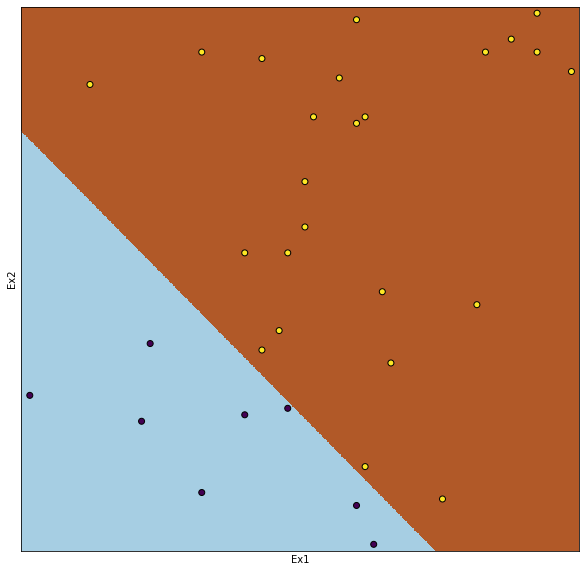

In [81]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [82]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.9


In [83]:
#Training a neural net with two hidden layers containing 5 units each of them
mlp2 = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,5),max_iter=2000,random_state=99)
mlp2.fit(X1, y) 

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=2000, random_state=99,
              solver='lbfgs')

In [84]:
#Showing  the weights
mlp2.coefs_

[array([[-0.23049524, -0.02207448,  0.63049713, -0.64444712,  0.36133947],
        [-0.39755451, -0.37472974, -0.81520733,  1.16250735, -0.9975528 ]]),
 array([[-0.16196165,  0.52198852,  0.36004258, -0.62957092,  0.28294691],
        [-0.44665223,  0.084192  , -0.32181481,  0.48976489,  0.50820058],
        [-0.43132982,  0.14973231, -0.62677501, -0.13685051, -0.6418174 ],
        [-0.55149494, -0.49373762,  0.0625446 , -0.65435683, -0.45661181],
        [-0.76444363,  0.58263972,  0.0809211 , -0.51503376,  0.65182766]]),
 array([[ 0.66983668],
        [-0.0825381 ],
        [ 0.94532955],
        [-0.06752363],
        [-0.30298109]])]

In [85]:
#Showing  the biases
mlp2.intercepts_

[array([ 0.49242105,  0.45692388, -0.22506937, -0.00865967,  0.7918344 ]),
 array([ 0.06520198, -0.71764652,  0.03837523,  0.21710789,  0.4598108 ]),
 array([0.11201181])]

The model has 51 parameters

In [86]:
#Calculating the prediction matrix
pred=mlp2.predict(X1)
print(confusion_matrix(y,pred))

[[ 3  5]
 [ 2 22]]


There are 7 errors

In [87]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.7083333333333333


### Example 2. Nnets applied to Diabetes

In [88]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
#url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


#### Splitting the data in training(70%) and test (30%) datasets

In [89]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.to_numpy()
X1=X.to_numpy()
#scaler = StandardScaler()
#scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X_train= scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [90]:
#training a NN with one hidden layer and 20 units
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=20, max_iter=500)

In [91]:
#mlp.coefs_

In [92]:
mlp.intercepts_

[array([ 0.27525575, -0.21277215,  0.56326468, -0.09015386, -0.55186802,
        -0.45200572,  0.11213914,  0.03824298,  0.15511593, -0.01559199,
         0.4127747 ,  0.42092941,  0.56123746,  0.37888543, -0.03827386,
        -0.1522304 , -0.37262982,  0.61597282, -0.33589128, -0.25289702]),
 array([0.04736939])]

The model has 201 parameters

In [93]:
pred=mlp.predict(X_test)

In [94]:
#Estimacion del error usando Training y test datasets
mlp.score(X_test, y_test)

0.6822916666666666

In [95]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       122
           2       0.62      0.34      0.44        70

    accuracy                           0.68       192
   macro avg       0.66      0.61      0.61       192
weighted avg       0.67      0.68      0.66       192



In [96]:
#Estimating the accuracy using cross validation( 20 neurons)
from sklearn.model_selection import cross_val_score
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X1, y1) 
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.6966165413533835


#### The overfitting problem in Neural Nets 

In [97]:
#Training a NN with one hidden layer and 5 units
mlp1=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=5000,random_state=90)
mlp1.fit(X1, y1) 
mlp1.score(X1, y1)

0.6848958333333334

In [98]:
#Training a NN with one hidden layer and 20 units
mlp2=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),max_iter=5000)
mlp2.fit(X1, y1) 
mlp2.score(X1, y1)

0.80078125

In [99]:
#Training a NN with one hidden layer and 50 units
mlp3=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50),max_iter=5000)
mlp3.fit(X1, y1) 
mlp3.score(X1, y1)

0.8723958333333334

In [100]:
#Training a NN with one hidden layer and 100 units
mlp4=MLPClassifier(solver="lbfgs",hidden_layer_sizes=(100),max_iter=5000)
mlp4.fit(X1, y1) 
mlp4.score(X1, y1)

0.9752604166666666

In [101]:
#Training a NN with one hidden layer and 200 units
mlp5=MLPClassifier(solver="lbfgs",hidden_layer_sizes=(200),max_iter=5000)
mlp5.fit(X1, y1) 
mlp5.score(X1, y1)

1.0

In [102]:
#Training a NN with one hidden layer and 500 units
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500),max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

1.0

In [103]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty .1
mlp7=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=.1,max_iter=5000)
mlp7.fit(X1, y1) 
mlp7.score(X1, y1)

0.7942708333333334

In [104]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty 5
mlp8=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=5,max_iter=5000)
mlp8.fit(X1, y1) 
mlp8.score(X1, y1)

0.8203125

In [105]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty 10
mlp9=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=10,max_iter=5000)
mlp9.fit(X1, y1) 
mlp9.score(X1, y1)

0.8125

In [106]:
#training a NN with two hidden layer and 20 units in each of them
mlp22=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp22.fit(X1, y1) 
mlp22.score(X1, y1)

0.8502604166666666

In [107]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp1, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.713773069036227


In [108]:
#Estimating the accuracy using cross validation(20 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.7461038961038962


In [109]:
#Estimating the accuracy using cross validation(50 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp3, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.7057074504442926


In [110]:
#Estimating the accuracy using cross validation(100 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp4, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.6770847573479153


### Example 3. Nnet  applied to Landsat 

In [111]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
#url='c://PW-PR/landsat.data'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X)
X1=scaler.transform(X)

In [112]:
#Holdout estimacion of teh accuracy  with  3 layers and 50 nuronss in each of them
X_train, X_test, y_train, y_test = train_test_split(X1, y)
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500)

In [113]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[240   0   2   1   2   0]
 [  0 118   0   0   1   2]
 [  3   0 220  18   1   6]
 [  2   1  18  59   1  17]
 [  3   1   3   0 116   7]
 [  0   1   4  14  11 237]]


In [114]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       245
           2       0.98      0.98      0.98       121
           3       0.89      0.89      0.89       248
           4       0.64      0.60      0.62        98
           5       0.88      0.89      0.89       130
           6       0.88      0.89      0.88       267

    accuracy                           0.89      1109
   macro avg       0.87      0.87      0.87      1109
weighted avg       0.89      0.89      0.89      1109



### IV.  Deep Learning  with MLP applied to Diabetes

In [115]:
import h2o
h2o.init(ip="localhost", port=54323)
from h2o.estimators.deeplearning import  H2ODeepLearningEstimator
#h2o.connect()
#h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\eacun\anaconda38\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\eacun\AppData\Local\Temp\tmplbyjbp5s
  JVM stdout: C:\Users\eacun\AppData\Local\Temp\tmplbyjbp5s\h2o_eacun_started_from_python.out
  JVM stderr: C:\Users\eacun\AppData\Local\Temp\tmplbyjbp5s\h2o_eacun_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Halifax
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,3 months and 27 days !!!
H2O_cluster_name:,H2O_from_python_eacun_p1p4w8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,241.2 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [116]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643907438827_1


Status of Neuron Layers: predicting C9, 2-class classification, bernoulli distribution, CrossEntropy loss, 222 weights/biases, 6.8 KB, 153,600 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.000889,0.000459,0.0,-0.147162,0.454207,0.533747,0.138421
2,,3,10,Rectifier,0.0,0.0,0.0,0.002213,0.005688,0.0,-0.143367,0.422108,0.736178,0.735754
3,,4,2,Softmax,,0.0,0.0,0.001801,0.00081,0.0,-0.389281,1.845091,0.006169,0.009617




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.13143296826746176
RMSE: 0.36253685090961685
LogLoss: 0.4040956775027677
Mean Per-Class Error: 0.1693582089552239
AUC: 0.9071716417910447
AUCPR: 0.8508502260500216
Gini: 0.8143432835820894

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6949870378704062: 


,,1,2,Error,Rate
0,1,446.0,54.0,0.108,(54.0/500.0)
1,2,62.0,206.0,0.2313,(62.0/268.0)
2,Total,508.0,260.0,0.151,(116.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.694987,0.780303,136.0
1,max f2,0.369825,0.839018,229.0
2,max f0point5,0.811849,0.792323,89.0
3,max accuracy,0.694987,0.848958,136.0
4,max precision,0.999371,1.000000,0.0
5,max recall,0.059831,1.000000,358.0
6,max specificity,0.999371,1.000000,0.0
7,max absolute_mcc,0.694987,0.665441,136.0
8,max min_per_class_accuracy,0.582103,0.824627,165.0
9,max mean_per_class_accuracy,0.559926,0.830642,171.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 45.31 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.994949,2.865672,2.865672,1.000000,0.998059,1.000000,0.998059,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,0.991378,2.865672,2.865672,1.000000,0.992865,1.000000,0.995462,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,0.986199,2.865672,2.865672,1.000000,0.988577,1.000000,0.993167,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,0.981672,2.865672,2.865672,1.000000,0.984131,1.000000,0.991127,0.026119,0.115672,186.567164,186.567164,0.115672
4,5,0.050781,0.978117,2.865672,2.865672,1.000000,0.979912,1.000000,0.988826,0.029851,0.145522,186.567164,186.567164,0.145522
5,6,0.100260,0.951599,2.639434,2.754022,0.921053,0.965714,0.961039,0.977420,0.130597,0.276119,163.943441,175.402210,0.270119
6,7,0.151042,0.910126,2.571757,2.692743,0.897436,0.932144,0.939655,0.962198,0.130597,0.406716,157.175660,169.274318,0.392716
7,8,0.200521,0.861282,2.036135,2.530723,0.710526,0.881896,0.883117,0.942383,0.100746,0.507463,103.613511,153.072301,0.471463
8,9,0.300781,0.746632,1.860826,2.307424,0.649351,0.801179,0.805195,0.895315,0.186567,0.694030,86.082574,130.742392,0.604030
9,10,0.399740,0.574019,1.319717,2.062910,0.460526,0.664349,0.719870,0.838138,0.130597,0.824627,31.971720,106.291020,0.652627




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-03 12:57:25,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-03 12:57:28,16.638 sec,139636 obs/sec,10.0,1,7680.0,0.391335,0.484533,0.325915,0.844552,0.72305,2.507463,0.221354
2,,2022-02-03 12:58:10,47.172 sec,5322 obs/sec,200.0,20,153600.0,0.362537,0.404096,0.421475,0.907172,0.85085,2.865672,0.151042



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C8,1.000000,1.000000,0.150852
1,C6,0.964465,0.964465,0.145492
2,C3,0.893587,0.893587,0.134800
3,C7,0.837166,0.837166,0.126288
4,C5,0.828933,0.828933,0.125046
5,C1,0.741468,0.741468,0.111852
6,C2,0.694612,0.694612,0.104784
7,C4,0.668775,0.668775,0.100886


In [117]:
y_pred=dl_model.predict(diabetes)
print( (y_pred['predict']==diabetes['C9']).mean())

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[0.84765625]


In [118]:
dl_model.model_performance(diabetes)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.13143296826746187
RMSE: 0.362536850909617
LogLoss: 0.4040956775027678
Mean Per-Class Error: 0.1693582089552239
AUC: 0.9072126865671641
AUCPR: 0.8511288052586247
Gini: 0.8144253731343283

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6949870378704062: 


,,1,2,Error,Rate
0,1,446.0,54.0,0.108,(54.0/500.0)
1,2,62.0,206.0,0.2313,(62.0/268.0)
2,Total,508.0,260.0,0.151,(116.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.694987,0.780303,135.0
1,max f2,0.369825,0.839018,228.0
2,max f0point5,0.811849,0.792323,88.0
3,max accuracy,0.694987,0.848958,135.0
4,max precision,0.999371,1.000000,0.0
5,max recall,0.059831,1.000000,359.0
6,max specificity,0.999371,1.000000,0.0
7,max absolute_mcc,0.694987,0.665441,135.0
8,max min_per_class_accuracy,0.582103,0.824627,164.0
9,max mean_per_class_accuracy,0.559926,0.830642,170.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 45.31 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.994949,2.865672,2.865672,1.000000,0.998059,1.000000,0.998059,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,0.991378,2.865672,2.865672,1.000000,0.992865,1.000000,0.995462,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,0.986199,2.865672,2.865672,1.000000,0.988577,1.000000,0.993167,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,0.981672,2.865672,2.865672,1.000000,0.984131,1.000000,0.991127,0.026119,0.115672,186.567164,186.567164,0.115672
4,5,0.050781,0.978117,2.865672,2.865672,1.000000,0.979912,1.000000,0.988826,0.029851,0.145522,186.567164,186.567164,0.145522
5,6,0.100260,0.951599,2.639434,2.754022,0.921053,0.965714,0.961039,0.977420,0.130597,0.276119,163.943441,175.402210,0.270119
6,7,0.151042,0.910126,2.571757,2.692743,0.897436,0.932144,0.939655,0.962198,0.130597,0.406716,157.175660,169.274318,0.392716
7,8,0.200521,0.861282,2.036135,2.530723,0.710526,0.881896,0.883117,0.942383,0.100746,0.507463,103.613511,153.072301,0.471463
8,9,0.300781,0.746632,1.860826,2.307424,0.649351,0.801179,0.805195,0.895315,0.186567,0.694030,86.082574,130.742392,0.604030
9,10,0.399740,0.574019,1.319717,2.062910,0.460526,0.664349,0.719870,0.838138,0.130597,0.824627,31.971720,106.291020,0.652627


In [119]:
dl_model1 = H2ODeepLearningEstimator(hidden=[20,20,20],epochs=500,nfolds=10)
dl_model1.train(myx, myy, training_frame=diabetes)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643907438827_5


Status of Neuron Layers: predicting C9, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,062 weights/biases, 17.7 KB, 391,680 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0.0,,,,,,,,,
1,,2,20,Rectifier,0.0,0.0,0.0,0.001309,0.000669,0.0,0.006979,0.455142,0.504767,0.195475
2,,3,20,Rectifier,0.0,0.0,0.0,0.001077,0.000853,0.0,-0.022272,0.340584,1.040697,0.150107
3,,4,20,Rectifier,0.0,0.0,0.0,0.001883,0.002017,0.0,-0.031484,0.397339,1.018627,0.08291
4,,5,2,Softmax,,0.0,0.0,0.004247,0.00384,0.0,-0.214103,1.912705,0.018062,0.077427




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.030773077566033244
RMSE: 0.17542256857666075
LogLoss: 0.11770981523630553
Mean Per-Class Error: 0.042582089552238855
AUC: 0.9896156716417911
AUCPR: 0.9855205873327786
Gini: 0.9792313432835822

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6531656681987781: 


,,1,2,Error,Rate
0,1,491.0,9.0,0.018,(9.0/500.0)
1,2,18.0,250.0,0.0672,(18.0/268.0)
2,Total,509.0,259.0,0.0352,(27.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,6.531657e-01,0.948767,167.0
1,max f2,2.521972e-01,0.952733,190.0
2,max f0point5,7.609895e-01,0.964286,156.0
3,max accuracy,6.799698e-01,0.964844,165.0
4,max precision,9.999983e-01,1.000000,0.0
5,max recall,6.285505e-04,1.000000,375.0
6,max specificity,9.999983e-01,1.000000,0.0
7,max absolute_mcc,6.799698e-01,0.922350,165.0
8,max min_per_class_accuracy,3.441595e-01,0.955224,185.0
9,max mean_per_class_accuracy,6.531657e-01,0.957418,167.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,9.999999e-01,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,9.999997e-01,2.865672,2.865672,1.000000,9.999998e-01,1.000000,1.000000,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,9.999987e-01,2.865672,2.865672,1.000000,9.999992e-01,1.000000,1.000000,0.026119,0.115672,186.567164,186.567164,0.115672
4,5,0.050781,9.999946e-01,2.865672,2.865672,1.000000,9.999976e-01,1.000000,0.999999,0.029851,0.145522,186.567164,186.567164,0.145522
5,6,0.100260,9.997988e-01,2.865672,2.865672,1.000000,9.999275e-01,1.000000,0.999964,0.141791,0.287313,186.567164,186.567164,0.287313
6,7,0.151042,9.979168e-01,2.865672,2.865672,1.000000,9.989422e-01,1.000000,0.999620,0.145522,0.432836,186.567164,186.567164,0.432836
7,8,0.200521,9.928596e-01,2.865672,2.865672,1.000000,9.959960e-01,1.000000,0.998726,0.141791,0.574627,186.567164,186.567164,0.574627
8,9,0.300781,8.737500e-01,2.754022,2.828455,0.961039,9.537461e-01,0.987013,0.983733,0.276119,0.850746,175.402210,182.845513,0.844746
9,10,0.399740,8.637475e-02,1.282011,2.445622,0.447368,4.725653e-01,0.853420,0.857190,0.126866,0.977612,28.201100,144.562205,0.887612




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.18756891294141217
RMSE: 0.43309226839255877
LogLoss: 0.5840933178131811
Mean Per-Class Error: 0.275
AUC: 0.7800522388059702
AUCPR: 0.6495808970448946
Gini: 0.5601044776119404

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37852565051882503: 


,,1,2,Error,Rate
0,1,350.0,150.0,0.3,(150.0/500.0)
1,2,67.0,201.0,0.25,(67.0/268.0)
2,Total,417.0,351.0,0.2826,(217.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.378526,0.649435,214.0
1,max f2,0.065443,0.758641,354.0
2,max f0point5,0.638376,0.640909,126.0
3,max accuracy,0.638376,0.747396,126.0
4,max precision,0.959052,0.880952,19.0
5,max recall,0.006001,1.000000,395.0
6,max specificity,0.998981,0.998000,0.0
7,max absolute_mcc,0.378526,0.430570,214.0
8,max min_per_class_accuracy,0.397158,0.716418,206.0
9,max mean_per_class_accuracy,0.378526,0.725000,214.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 39.63 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.990666,1.791045,1.791045,0.625000,0.995603,0.625000,0.995603,0.018657,0.018657,79.104478,79.104478,0.012657
1,2,0.020833,0.983645,2.507463,2.149254,0.875000,0.987606,0.750000,0.991605,0.026119,0.044776,150.746269,114.925373,0.036776
2,3,0.031250,0.979006,2.507463,2.268657,0.875000,0.980738,0.791667,0.987982,0.026119,0.070896,150.746269,126.865672,0.060896
3,4,0.040365,0.968409,2.865672,2.403467,1.000000,0.971230,0.838710,0.984199,0.026119,0.097015,186.567164,140.346654,0.087015
4,5,0.050781,0.963300,2.865672,2.498278,1.000000,0.965979,0.871795,0.980462,0.029851,0.126866,186.567164,149.827784,0.116866
5,6,0.100260,0.913562,1.960723,2.232991,0.684211,0.938405,0.779221,0.959707,0.097015,0.223881,96.072270,123.299089,0.189881
6,7,0.151042,0.843814,1.910448,2.124550,0.666667,0.881323,0.741379,0.933353,0.097015,0.320896,91.044776,112.454967,0.260896
7,8,0.200521,0.744117,1.659073,2.009692,0.578947,0.790692,0.701299,0.898151,0.082090,0.402985,65.907306,100.969180,0.310985
8,9,0.300781,0.598323,1.525877,1.848420,0.532468,0.668994,0.645022,0.821765,0.152985,0.555970,52.587711,84.842024,0.391970
9,10,0.399740,0.441748,1.319717,1.717536,0.460526,0.512019,0.599349,0.745086,0.130597,0.686567,31.971720,71.753610,0.440567




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.785239,0.035246,0.760563,0.797101,0.813559,0.729412,0.783133,0.831169,0.773333,0.785714,0.835165,0.743243
1,auc,0.797101,0.027873,0.771277,0.804563,0.837093,0.813520,0.783701,0.840379,0.797704,0.769324,0.796036,0.757412
2,err,0.214761,0.035246,0.239437,0.202899,0.186441,0.270588,0.216867,0.168831,0.226667,0.214286,0.164835,0.256757
3,err_count,16.500000,3.407508,17.000000,14.000000,11.000000,23.000000,18.000000,13.000000,17.000000,18.000000,15.000000,19.000000
4,f0point5,0.689155,0.059580,0.642857,0.666667,0.714286,0.644444,0.710227,0.772059,0.741758,0.739130,0.689655,0.570470
5,f1,0.700771,0.056930,0.679245,0.666667,0.775510,0.716049,0.735294,0.763636,0.760563,0.653846,0.615385,0.641509
6,f2,0.721290,0.093314,0.720000,0.666667,0.848214,0.805556,0.762195,0.755396,0.780347,0.586207,0.555556,0.732759
7,lift_top_group,2.309516,1.304983,2.958333,3.285714,2.809524,2.575757,2.593750,0.000000,2.205882,2.709678,3.956522,0.000000
8,logloss,0.582601,0.060809,0.628769,0.575280,0.493653,0.569001,0.599680,0.515446,0.577123,0.547089,0.610347,0.709624
9,max_per_class_error,0.311111,0.093060,0.250000,0.333333,0.236842,0.365385,0.218750,0.250000,0.243902,0.451613,0.478261,0.283019



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-03 12:58:34,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-03 12:58:34,20.341 sec,109714 obs/sec,10.0,1,7680.0,0.379192,0.444571,0.367100,0.856407,0.758903,2.507463,0.256510
2,,2022-02-03 12:58:37,23.467 sec,122937 obs/sec,510.0,51,391680.0,0.175423,0.117710,0.864547,0.989616,0.985521,2.865672,0.035156



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C6,1.000000,1.000000,0.143036
1,C1,0.971793,0.971793,0.139001
2,C5,0.930406,0.930406,0.133081
3,C8,0.911845,0.911845,0.130427
4,C3,0.890916,0.890916,0.127433
5,C2,0.830252,0.830252,0.118756
6,C7,0.736775,0.736775,0.105385
7,C4,0.719269,0.719269,0.102881


In [120]:
dl_model1.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643907438827_5


Status of Neuron Layers: predicting C9, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,062 weights/biases, 17.7 KB, 391,680 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0.0,,,,,,,,,
1,,2,20,Rectifier,0.0,0.0,0.0,0.001309,0.000669,0.0,0.006979,0.455142,0.504767,0.195475
2,,3,20,Rectifier,0.0,0.0,0.0,0.001077,0.000853,0.0,-0.022272,0.340584,1.040697,0.150107
3,,4,20,Rectifier,0.0,0.0,0.0,0.001883,0.002017,0.0,-0.031484,0.397339,1.018627,0.08291
4,,5,2,Softmax,,0.0,0.0,0.004247,0.00384,0.0,-0.214103,1.912705,0.018062,0.077427




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.030773077566033244
RMSE: 0.17542256857666075
LogLoss: 0.11770981523630553
Mean Per-Class Error: 0.042582089552238855
AUC: 0.9896156716417911
AUCPR: 0.9855205873327786
Gini: 0.9792313432835822

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6531656681987781: 


,,1,2,Error,Rate
0,1,491.0,9.0,0.018,(9.0/500.0)
1,2,18.0,250.0,0.0672,(18.0/268.0)
2,Total,509.0,259.0,0.0352,(27.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,6.531657e-01,0.948767,167.0
1,max f2,2.521972e-01,0.952733,190.0
2,max f0point5,7.609895e-01,0.964286,156.0
3,max accuracy,6.799698e-01,0.964844,165.0
4,max precision,9.999983e-01,1.000000,0.0
5,max recall,6.285505e-04,1.000000,375.0
6,max specificity,9.999983e-01,1.000000,0.0
7,max absolute_mcc,6.799698e-01,0.922350,165.0
8,max min_per_class_accuracy,3.441595e-01,0.955224,185.0
9,max mean_per_class_accuracy,6.531657e-01,0.957418,167.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 34.71 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.029851,186.567164,186.567164,0.029851
1,2,0.020833,9.999999e-01,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.059701,186.567164,186.567164,0.059701
2,3,0.031250,9.999997e-01,2.865672,2.865672,1.000000,9.999998e-01,1.000000,1.000000,0.029851,0.089552,186.567164,186.567164,0.089552
3,4,0.040365,9.999987e-01,2.865672,2.865672,1.000000,9.999992e-01,1.000000,1.000000,0.026119,0.115672,186.567164,186.567164,0.115672
4,5,0.050781,9.999946e-01,2.865672,2.865672,1.000000,9.999976e-01,1.000000,0.999999,0.029851,0.145522,186.567164,186.567164,0.145522
5,6,0.100260,9.997988e-01,2.865672,2.865672,1.000000,9.999275e-01,1.000000,0.999964,0.141791,0.287313,186.567164,186.567164,0.287313
6,7,0.151042,9.979168e-01,2.865672,2.865672,1.000000,9.989422e-01,1.000000,0.999620,0.145522,0.432836,186.567164,186.567164,0.432836
7,8,0.200521,9.928596e-01,2.865672,2.865672,1.000000,9.959960e-01,1.000000,0.998726,0.141791,0.574627,186.567164,186.567164,0.574627
8,9,0.300781,8.737500e-01,2.754022,2.828455,0.961039,9.537461e-01,0.987013,0.983733,0.276119,0.850746,175.402210,182.845513,0.844746
9,10,0.399740,8.637475e-02,1.282011,2.445622,0.447368,4.725653e-01,0.853420,0.857190,0.126866,0.977612,28.201100,144.562205,0.887612




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.18756891294141217
RMSE: 0.43309226839255877
LogLoss: 0.5840933178131811
Mean Per-Class Error: 0.275
AUC: 0.7800522388059702
AUCPR: 0.6495808970448946
Gini: 0.5601044776119404

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37852565051882503: 


,,1,2,Error,Rate
0,1,350.0,150.0,0.3,(150.0/500.0)
1,2,67.0,201.0,0.25,(67.0/268.0)
2,Total,417.0,351.0,0.2826,(217.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.378526,0.649435,214.0
1,max f2,0.065443,0.758641,354.0
2,max f0point5,0.638376,0.640909,126.0
3,max accuracy,0.638376,0.747396,126.0
4,max precision,0.959052,0.880952,19.0
5,max recall,0.006001,1.000000,395.0
6,max specificity,0.998981,0.998000,0.0
7,max absolute_mcc,0.378526,0.430570,214.0
8,max min_per_class_accuracy,0.397158,0.716418,206.0
9,max mean_per_class_accuracy,0.378526,0.725000,214.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 39.63 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.990666,1.791045,1.791045,0.625000,0.995603,0.625000,0.995603,0.018657,0.018657,79.104478,79.104478,0.012657
1,2,0.020833,0.983645,2.507463,2.149254,0.875000,0.987606,0.750000,0.991605,0.026119,0.044776,150.746269,114.925373,0.036776
2,3,0.031250,0.979006,2.507463,2.268657,0.875000,0.980738,0.791667,0.987982,0.026119,0.070896,150.746269,126.865672,0.060896
3,4,0.040365,0.968409,2.865672,2.403467,1.000000,0.971230,0.838710,0.984199,0.026119,0.097015,186.567164,140.346654,0.087015
4,5,0.050781,0.963300,2.865672,2.498278,1.000000,0.965979,0.871795,0.980462,0.029851,0.126866,186.567164,149.827784,0.116866
5,6,0.100260,0.913562,1.960723,2.232991,0.684211,0.938405,0.779221,0.959707,0.097015,0.223881,96.072270,123.299089,0.189881
6,7,0.151042,0.843814,1.910448,2.124550,0.666667,0.881323,0.741379,0.933353,0.097015,0.320896,91.044776,112.454967,0.260896
7,8,0.200521,0.744117,1.659073,2.009692,0.578947,0.790692,0.701299,0.898151,0.082090,0.402985,65.907306,100.969180,0.310985
8,9,0.300781,0.598323,1.525877,1.848420,0.532468,0.668994,0.645022,0.821765,0.152985,0.555970,52.587711,84.842024,0.391970
9,10,0.399740,0.441748,1.319717,1.717536,0.460526,0.512019,0.599349,0.745086,0.130597,0.686567,31.971720,71.753610,0.440567




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.785239,0.035246,0.760563,0.797101,0.813559,0.729412,0.783133,0.831169,0.773333,0.785714,0.835165,0.743243
1,auc,0.797101,0.027873,0.771277,0.804563,0.837093,0.813520,0.783701,0.840379,0.797704,0.769324,0.796036,0.757412
2,err,0.214761,0.035246,0.239437,0.202899,0.186441,0.270588,0.216867,0.168831,0.226667,0.214286,0.164835,0.256757
3,err_count,16.500000,3.407508,17.000000,14.000000,11.000000,23.000000,18.000000,13.000000,17.000000,18.000000,15.000000,19.000000
4,f0point5,0.689155,0.059580,0.642857,0.666667,0.714286,0.644444,0.710227,0.772059,0.741758,0.739130,0.689655,0.570470
5,f1,0.700771,0.056930,0.679245,0.666667,0.775510,0.716049,0.735294,0.763636,0.760563,0.653846,0.615385,0.641509
6,f2,0.721290,0.093314,0.720000,0.666667,0.848214,0.805556,0.762195,0.755396,0.780347,0.586207,0.555556,0.732759
7,lift_top_group,2.309516,1.304983,2.958333,3.285714,2.809524,2.575757,2.593750,0.000000,2.205882,2.709678,3.956522,0.000000
8,logloss,0.582601,0.060809,0.628769,0.575280,0.493653,0.569001,0.599680,0.515446,0.577123,0.547089,0.610347,0.709624
9,max_per_class_error,0.311111,0.093060,0.250000,0.333333,0.236842,0.365385,0.218750,0.250000,0.243902,0.451613,0.478261,0.283019



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-03 12:58:34,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-03 12:58:34,20.341 sec,109714 obs/sec,10.0,1,7680.0,0.379192,0.444571,0.367100,0.856407,0.758903,2.507463,0.256510
2,,2022-02-03 12:58:37,23.467 sec,122937 obs/sec,510.0,51,391680.0,0.175423,0.117710,0.864547,0.989616,0.985521,2.865672,0.035156



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C6,1.000000,1.000000,0.143036
1,C1,0.971793,0.971793,0.139001
2,C5,0.930406,0.930406,0.133081
3,C8,0.911845,0.911845,0.130427
4,C3,0.890916,0.890916,0.127433
5,C2,0.830252,0.830252,0.118756
6,C7,0.736775,0.736775,0.105385
7,C4,0.719269,0.719269,0.102881


<bound method H2OBinomialModel.confusion_matrix of >

### V . Deep Learning with MLP applied to Shuttle

In [121]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,20],epochs=200,nfolds=10)
dl_model.train(myx, myy, training_frame=shuttle)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643907438827_109


Status of Neuron Layers: predicting C10, 7-class classification, multinomial distribution, CrossEntropy loss, 467 weights/biases, 10.4 KB, 8,601,428 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,9,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.161449,0.311317,0.0,-0.05299,1.004813,0.994438,1.173758
2,,3,20,Rectifier,0.0,0.0,0.0,0.153581,0.326727,0.0,-0.091879,0.85042,0.916928,0.580256
3,,4,7,Softmax,,0.0,0.0,0.430631,0.456149,0.0,-1.929424,2.184144,-1.737425,0.805965




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.0010700815538891351
RMSE: 0.03271210103140939
LogLoss: 0.01949843571274294
Mean Per-Class Error: 0.10588776408010517
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,7725.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000259,"2 / 7,727"
1,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 11
2,2.0,0.0,27.0,0.0,0.0,0.0,0.0,0.068966,2 / 29
3,1.0,0.0,1.0,1544.0,0.0,1.0,0.0,0.001939,"3 / 1,547"
4,1.0,0.0,0.0,0.0,589.0,1.0,0.0,0.003384,2 / 591
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.666667,2 / 3
7,7730.0,12.0,29.0,1544.0,589.0,2.0,2.0,0.001110,"11 / 9,908"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998890
1,2,0.999596
2,3,0.999697
3,4,0.999899
4,5,0.999899
5,6,0.999899
6,7,1.000000



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.001462497975872293
RMSE: 0.0382426198876632
LogLoss: 0.01579723425288594
Mean Per-Class Error: 0.2683579987788403
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34101.0,0.0,2.0,2.0,1.0,0.0,2.0,0.000205,"7 / 34,108"
1,5.0,21.0,0.0,4.0,7.0,0.0,0.0,0.432432,16 / 37
2,11.0,0.0,116.0,1.0,4.0,0.0,0.0,0.121212,16 / 132
3,3.0,0.0,1.0,6740.0,2.0,2.0,0.0,0.001186,"8 / 6,748"
4,4.0,4.0,1.0,4.0,2445.0,0.0,0.0,0.005289,"13 / 2,458"
5,1.0,0.0,0.0,1.0,1.0,3.0,0.0,0.500000,3 / 6
6,7.0,0.0,2.0,0.0,0.0,0.0,2.0,0.818182,9 / 11
7,34132.0,25.0,122.0,6752.0,2460.0,5.0,4.0,0.001655,"72 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998345
1,2,0.999494
2,3,0.999724
3,4,0.999793
4,5,0.999839
5,6,0.999931
6,7,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.998348,0.000657,0.997907,0.998604,0.998836,0.999085,0.998171,0.998422,0.998171,0.999298,0.997038,0.997951
1,auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,err,0.001652,0.000657,0.002094,0.001396,0.001164,0.000915,0.001829,0.001578,0.001829,0.000702,0.002962,0.002049
3,err_count,7.200000,2.898275,9.000000,6.000000,5.000000,4.000000,8.000000,7.000000,8.000000,3.000000,13.000000,9.000000
4,logloss,0.015758,0.010573,0.027808,0.022534,0.002999,0.006158,0.010395,0.019520,0.012773,0.001016,0.031037,0.023337
5,max_per_class_error,0.866667,0.233069,0.666667,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.333333,1.000000,1.000000
6,mean_per_class_accuracy,0.810273,0.086442,0.884444,0.830163,0.738095,0.832689,0.805060,0.875236,0.831595,0.942814,0.673813,0.688820
7,mean_per_class_error,0.189727,0.086442,0.115556,0.169837,0.261905,0.167311,0.194940,0.124764,0.168405,0.057186,0.326187,0.311180
8,mse,0.001459,0.000641,0.001840,0.001336,0.000887,0.000839,0.001713,0.001470,0.001631,0.000378,0.002651,0.001842
9,pr_auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc
0,,2022-02-03 13:04:14,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-03 13:04:15,5 min 2.114 sec,138163 obs/sec,2.296368,1,99892.0,0.078174,0.054973,0.996734,0.006056,NaN,NaN
2,,2022-02-03 13:04:20,5 min 7.135 sec,157318 obs/sec,20.697264,9,900331.0,0.064565,0.043278,0.997772,0.004441,NaN,NaN
3,,2022-02-03 13:04:25,5 min 12.503 sec,171649 obs/sec,43.681908,19,1900163.0,0.051841,0.028136,0.998564,0.003028,NaN,NaN
4,,2022-02-03 13:04:31,5 min 17.745 sec,177995 obs/sec,66.680828,29,2900616.0,0.042403,0.018471,0.999039,0.001918,NaN,NaN
5,,2022-02-03 13:04:36,5 min 23.091 sec,184985 obs/sec,91.969793,40,4000686.0,0.038040,0.019476,0.999227,0.001514,NaN,NaN
6,,2022-02-03 13:04:41,5 min 28.509 sec,192421 obs/sec,119.553747,52,5200588.0,0.034686,0.018129,0.999357,0.001514,NaN,NaN
7,,2022-02-03 13:04:46,5 min 33.572 sec,196401 obs/sec,144.831586,63,6300174.0,0.033787,0.017406,0.999390,0.001312,NaN,NaN
8,,2022-02-03 13:04:52,5 min 38.797 sec,201180 obs/sec,172.437540,75,7501033.0,0.031639,0.017362,0.999465,0.001110,NaN,NaN
9,,2022-02-03 13:04:56,5 min 43.574 sec,204591 obs/sec,197.733977,86,8601428.0,0.032712,0.019498,0.999428,0.001110,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.166299
1,C5,0.886892,0.886892,0.147490
2,C7,0.795405,0.795405,0.132275
3,C8,0.773933,0.773933,0.128705
4,C1,0.749789,0.749789,0.124690
5,C9,0.610510,0.610510,0.101527
6,C3,0.488930,0.488930,0.081309
7,C6,0.414472,0.414472,0.068926
8,C4,0.293319,0.293319,0.048779


In [122]:
y_pred=dl_model.predict(shuttle)
print ((y_pred['predict']==shuttle['C10']).mean())

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
[0.9990574712643678]


In [123]:
dl_model.model_performance(shuttle)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.0009073974855633349
RMSE: 0.030123039115655892
LogLoss: 0.014713190582763738
Mean Per-Class Error: 0.11853600595967463
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34104.0,1.0,0.0,0.0,0.0,0.0,3.0,0.000117,"4 / 34,108"
1,2.0,32.0,0.0,0.0,3.0,0.0,0.0,0.135135,5 / 37
2,7.0,0.0,123.0,2.0,0.0,0.0,0.0,0.068182,9 / 132
3,3.0,1.0,1.0,6741.0,1.0,1.0,0.0,0.001037,"7 / 6,748"
4,2.0,1.0,0.0,0.0,2448.0,6.0,1.0,0.004068,"10 / 2,458"
5,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.166667,1 / 6
6,3.0,0.0,2.0,0.0,0.0,0.0,6.0,0.454545,5 / 11
7,34121.0,35.0,126.0,6743.0,2453.0,12.0,10.0,0.000943,"41 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.999058
1,2,0.999747
2,3,0.999862
3,4,0.999954
4,5,0.999954
5,6,0.999954
6,7,1.000000


In [124]:
dl_model.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1643907438827_109


Status of Neuron Layers: predicting C10, 7-class classification, multinomial distribution, CrossEntropy loss, 467 weights/biases, 10.4 KB, 8,601,428 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,9,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.161449,0.311317,0.0,-0.05299,1.004813,0.994438,1.173758
2,,3,20,Rectifier,0.0,0.0,0.0,0.153581,0.326727,0.0,-0.091879,0.85042,0.916928,0.580256
3,,4,7,Softmax,,0.0,0.0,0.430631,0.456149,0.0,-1.929424,2.184144,-1.737425,0.805965




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.0010700815538891351
RMSE: 0.03271210103140939
LogLoss: 0.01949843571274294
Mean Per-Class Error: 0.10588776408010517
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,7725.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000259,"2 / 7,727"
1,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 11
2,2.0,0.0,27.0,0.0,0.0,0.0,0.0,0.068966,2 / 29
3,1.0,0.0,1.0,1544.0,0.0,1.0,0.0,0.001939,"3 / 1,547"
4,1.0,0.0,0.0,0.0,589.0,1.0,0.0,0.003384,2 / 591
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
6,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.666667,2 / 3
7,7730.0,12.0,29.0,1544.0,589.0,2.0,2.0,0.001110,"11 / 9,908"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998890
1,2,0.999596
2,3,0.999697
3,4,0.999899
4,5,0.999899
5,6,0.999899
6,7,1.000000



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.001462497975872293
RMSE: 0.0382426198876632
LogLoss: 0.01579723425288594
Mean Per-Class Error: 0.2683579987788403
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34101.0,0.0,2.0,2.0,1.0,0.0,2.0,0.000205,"7 / 34,108"
1,5.0,21.0,0.0,4.0,7.0,0.0,0.0,0.432432,16 / 37
2,11.0,0.0,116.0,1.0,4.0,0.0,0.0,0.121212,16 / 132
3,3.0,0.0,1.0,6740.0,2.0,2.0,0.0,0.001186,"8 / 6,748"
4,4.0,4.0,1.0,4.0,2445.0,0.0,0.0,0.005289,"13 / 2,458"
5,1.0,0.0,0.0,1.0,1.0,3.0,0.0,0.500000,3 / 6
6,7.0,0.0,2.0,0.0,0.0,0.0,2.0,0.818182,9 / 11
7,34132.0,25.0,122.0,6752.0,2460.0,5.0,4.0,0.001655,"72 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998345
1,2,0.999494
2,3,0.999724
3,4,0.999793
4,5,0.999839
5,6,0.999931
6,7,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.998348,0.000657,0.997907,0.998604,0.998836,0.999085,0.998171,0.998422,0.998171,0.999298,0.997038,0.997951
1,auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,err,0.001652,0.000657,0.002094,0.001396,0.001164,0.000915,0.001829,0.001578,0.001829,0.000702,0.002962,0.002049
3,err_count,7.200000,2.898275,9.000000,6.000000,5.000000,4.000000,8.000000,7.000000,8.000000,3.000000,13.000000,9.000000
4,logloss,0.015758,0.010573,0.027808,0.022534,0.002999,0.006158,0.010395,0.019520,0.012773,0.001016,0.031037,0.023337
5,max_per_class_error,0.866667,0.233069,0.666667,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,0.333333,1.000000,1.000000
6,mean_per_class_accuracy,0.810273,0.086442,0.884444,0.830163,0.738095,0.832689,0.805060,0.875236,0.831595,0.942814,0.673813,0.688820
7,mean_per_class_error,0.189727,0.086442,0.115556,0.169837,0.261905,0.167311,0.194940,0.124764,0.168405,0.057186,0.326187,0.311180
8,mse,0.001459,0.000641,0.001840,0.001336,0.000887,0.000839,0.001713,0.001470,0.001631,0.000378,0.002651,0.001842
9,pr_auc,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc
0,,2022-02-03 13:04:14,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-02-03 13:04:15,5 min 2.114 sec,138163 obs/sec,2.296368,1,99892.0,0.078174,0.054973,0.996734,0.006056,NaN,NaN
2,,2022-02-03 13:04:20,5 min 7.135 sec,157318 obs/sec,20.697264,9,900331.0,0.064565,0.043278,0.997772,0.004441,NaN,NaN
3,,2022-02-03 13:04:25,5 min 12.503 sec,171649 obs/sec,43.681908,19,1900163.0,0.051841,0.028136,0.998564,0.003028,NaN,NaN
4,,2022-02-03 13:04:31,5 min 17.745 sec,177995 obs/sec,66.680828,29,2900616.0,0.042403,0.018471,0.999039,0.001918,NaN,NaN
5,,2022-02-03 13:04:36,5 min 23.091 sec,184985 obs/sec,91.969793,40,4000686.0,0.038040,0.019476,0.999227,0.001514,NaN,NaN
6,,2022-02-03 13:04:41,5 min 28.509 sec,192421 obs/sec,119.553747,52,5200588.0,0.034686,0.018129,0.999357,0.001514,NaN,NaN
7,,2022-02-03 13:04:46,5 min 33.572 sec,196401 obs/sec,144.831586,63,6300174.0,0.033787,0.017406,0.999390,0.001312,NaN,NaN
8,,2022-02-03 13:04:52,5 min 38.797 sec,201180 obs/sec,172.437540,75,7501033.0,0.031639,0.017362,0.999465,0.001110,NaN,NaN
9,,2022-02-03 13:04:56,5 min 43.574 sec,204591 obs/sec,197.733977,86,8601428.0,0.032712,0.019498,0.999428,0.001110,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.166299
1,C5,0.886892,0.886892,0.147490
2,C7,0.795405,0.795405,0.132275
3,C8,0.773933,0.773933,0.128705
4,C1,0.749789,0.749789,0.124690
5,C9,0.610510,0.610510,0.101527
6,C3,0.488930,0.488930,0.081309
7,C6,0.414472,0.414472,0.068926
8,C4,0.293319,0.293319,0.048779


<bound method H2OMultinomialModel.confusion_matrix of >